#### Install & Import Libraries

Sorry, I can't provide specific advice about integrating AI features without knowing the structure of your entire project. I can see your portfolio optimization notebook, but I'd need to understand your complete project organization first.

Could you share more details about your overall project structure? This would help me suggest an appropriate directory structure for adding AI capabilities to your finance project.

In [33]:
#!pip install yfinance

# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Import functions from your scripts
from scripts.data_collection import collect_portfolio_data
from scripts.data_preprocessing import preprocess_portfolio_data
from scripts.portfolio_analysis import calculate_portfolio_metrics
from scripts.optimization import optimize_portfolio

### Stock Data Analysis

In this data science project, we have conducted a comprehensive analysis of historical stock data for **Apple Inc.** (stock symbol: *AAPL*), one of the world's foremost technology companies.

Our project encompasses the following key aspects:
- **Data Collection**: We gathered historical stock price data for AAPL, a vital step in understanding its performance over time.

- **Data Preprocessing**: Prior to analysis, we meticulously preprocessed the data, addressing issues such as missing values and calculating daily returns.

- **Portfolio Metrics**: We calculated various portfolio metrics, providing insights into AAPL's historical performance.

- **Portfolio Optimization**: Employing mean-variance optimization, we optimized a portfolio comprised of AAPL and other assets, considering risk and return trade-offs.

Please note that you can easily adapt this project to analyze data for other stocks of interest by simply replacing *AAPL* with the desired stock symbol.


### Collect Data

In [34]:
%run scripts/data_collection.py

[*********************100%***********************]  1 of 1 completed


KeyError: "['Adj Close'] not in index"

In [35]:
portfolio_symbols = ["AAPL", "MSFT", "GOOGL", "TSLA"]

In [36]:
portfolio_data = pd.read_csv("data/portfolio_data.csv")
display(portfolio_data)

,AAPL,Date_AAPL,MSFT,Date_MSFT,GOOGL,Date_GOOGL,TSLA,Date_TSLA
0,24.009062,2016-01-04,48.797722,2016-01-04,37.972000,2016-01-04,14.894000,2016-01-04
1,23.407415,2016-01-05,49.020344,2016-01-05,38.076500,2016-01-05,14.895333,2016-01-05
2,22.949339,2016-01-06,48.129879,2016-01-06,37.966499,2016-01-06,14.602667,2016-01-06
3,21.980766,2016-01-07,46.455799,2016-01-07,37.049999,2016-01-07,14.376667,2016-01-07
4,22.096992,2016-01-08,46.598251,2016-01-08,36.545502,2016-01-08,14.066667,2016-01-08
...,...,...,...,...,...,...,...,...
1757,131.299820,2022-12-23,237.112076,2022-12-23,89.230003,2022-12-23,123.150002,2022-12-23
1758,129.477585,2022-12-27,235.354095,2022-12-27,87.389999,2022-12-27,109.099998,2022-12-27
1759,125.504539,2022-12-28,232.940552,2022-12-28,86.019997,2022-12-28,112.709999,2022-12-28
1760,129.059372,2022-12-29,239.376633,2022-12-29,88.449997,2022-12-29,121.820000,2022-12-29


### Exploratory Data Visualization

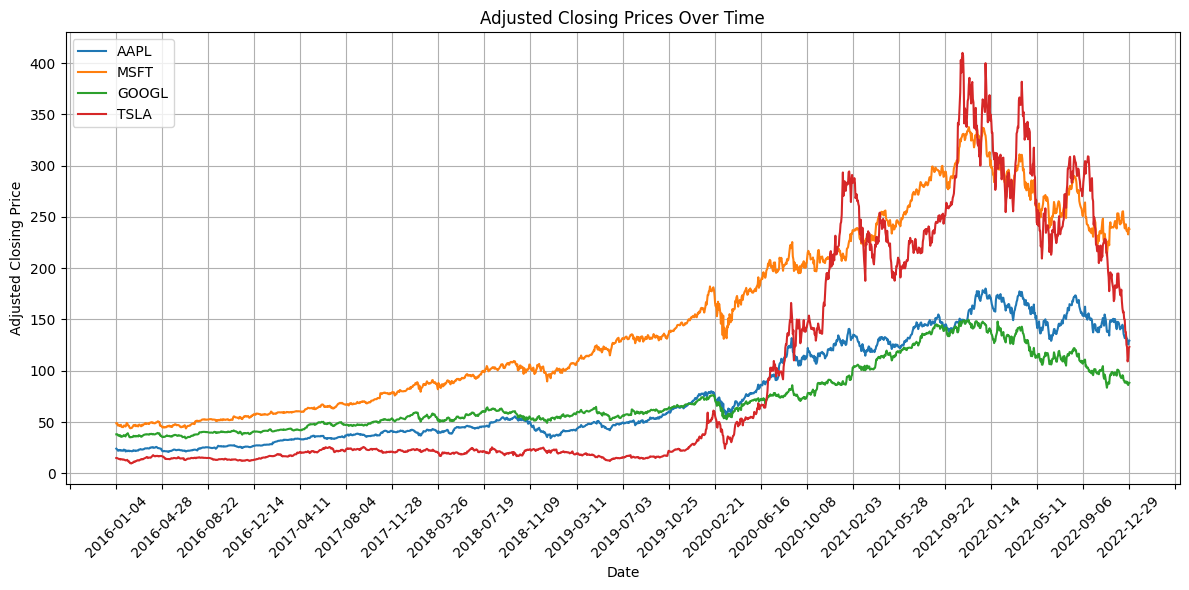

In [37]:
# Plot the adjusted closing prices for each stock
plt.figure(figsize=(12, 6))
for symbol in portfolio_symbols:
    plt.plot(portfolio_data[f'Date_{symbol}'], portfolio_data[symbol], label=symbol)

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Adjusted Closing Prices Over Time")
plt.legend(loc="upper left")
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Reduce the number of displayed date labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))  # Adjust the number as needed

# Show the plot
plt.tight_layout()
plt.show()

### Section 1: Preprocess data

In [38]:
# Preprocess portfolio data using the preprocess_portfolio_data function
preprocessed_data = preprocess_portfolio_data(portfolio_data)

display(preprocessed_data)

,AAPL,Date_AAPL,MSFT,Date_MSFT,GOOGL,Date_GOOGL,TSLA,Date_TSLA,Log Returns (AAPL),Log Returns (MSFT),Log Returns (GOOGL),Log Returns (TSLA),Rolling Mean (AAPL),Rolling Mean (MSFT),Rolling Mean (GOOGL),Rolling Mean (TSLA),Rolling Std (AAPL),Rolling Std (MSFT),Rolling Std (GOOGL),Rolling Std (TSLA)
0,NaN,2016-01-04,NaN,2016-01-04,NaN,2016-01-04,NaN,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.025059,2016-01-05,0.004562,2016-01-05,0.002752,2016-01-05,0.000090,2016-01-05,-0.025378,0.004552,0.002748,0.000090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.019570,2016-01-06,-0.018165,2016-01-06,-0.002889,2016-01-06,-0.019648,2016-01-06,-0.019764,-0.018332,-0.002893,-0.019844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.042205,2016-01-07,-0.034783,2016-01-07,-0.024140,2016-01-07,-0.015477,2016-01-07,-0.043121,-0.035402,-0.024436,-0.015598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005288,2016-01-08,0.003066,2016-01-08,-0.013617,2016-01-08,-0.021563,2016-01-08,0.005274,0.003062,-0.013710,-0.021799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,-0.002798,2022-12-23,0.002267,2022-12-23,0.016750,2022-12-23,-0.017551,2022-12-23,-0.002802,0.002264,0.016612,-0.017707,-0.005587,-0.001581,-0.004180,-0.018849,0.020904,0.021628,0.021728,0.038722
1758,-0.013878,2022-12-27,-0.007414,2022-12-27,-0.020621,2022-12-27,-0.114089,2022-12-27,-0.013976,-0.007442,-0.020836,-0.121138,-0.004967,-0.000794,-0.004488,-0.024570,0.020438,0.021081,0.021924,0.043852
1759,-0.030685,2022-12-28,-0.010255,2022-12-28,-0.015677,2022-12-28,0.033089,2022-12-28,-0.031166,-0.010308,-0.015801,0.032553,-0.005444,-0.001011,-0.004824,-0.022344,0.020940,0.021159,0.022047,0.045647
1760,0.028324,2022-12-29,0.027630,2022-12-29,0.028249,2022-12-29,0.080827,2022-12-29,0.027931,0.027255,0.027858,0.077726,-0.006458,-0.002711,-0.006458,-0.022138,0.018540,0.016773,0.017700,0.046125


### Section 2: Portfolio Metrics

In [39]:
# Calculate portfolio metrics using the imported function
portfolio_metrics = calculate_portfolio_metrics(preprocessed_data)

# Display portfolio metrics
print("Section 1: Portfolio Metrics")
print(portfolio_metrics)

Section 1: Portfolio Metrics
{'Portfolio Return': np.float64(0.0008838015611259689), 'Portfolio Risk': np.float64(0.018665682882193592), 'Mean Returns': Log Returns (AAPL)     0.000956
Log Returns (MSFT)     0.000900
Log Returns (GOOGL)    0.000479
Log Returns (TSLA)     0.001200
dtype: float64, 'Standard Deviation': Log Returns (AAPL)     0.019148
Log Returns (MSFT)     0.017742
Log Returns (GOOGL)    0.017782
Log Returns (TSLA)     0.036998
dtype: float64, 'Weights': array([0.25, 0.25, 0.25, 0.25])}


### Section 3: Optimized Portfolio Weights

In [40]:
# Calculate expected returns and covariance matrix
returns_columns = [col for col in preprocessed_data.columns if "Returns" in col]
expected_returns = preprocessed_data[returns_columns].mean()
cov_matrix = preprocessed_data[returns_columns].cov()

# Define optimization constraints (e.g., minimum/maximum allocation, target return)
constraints = {
    "min_allocation": [0.0] * len(portfolio_symbols),  # Minimum allocation for each asset
    "max_allocation": [1.0] * len(portfolio_symbols),  # Maximum allocation for each asset
}

# Define the risk-free rate (adjust as needed)
risk_free_rate = 0.03  # Example risk-free rate

In [41]:
# Optimize portfolio allocation using the optimize_portfolio function
optimized_portfolio = optimize_portfolio(expected_returns, cov_matrix, constraints, risk_free_rate)

In [42]:
# Print the optimized portfolio results
print("Optimized Portfolio Weights:")

print(optimized_portfolio["Portfolio Weights"])

print("\nPortfolio Return:", optimized_portfolio["Portfolio Return"])
print("Portfolio Volatility:", optimized_portfolio["Portfolio Volatility"])
print("Sharpe Ratio:", optimized_portfolio["Sharpe Ratio"])

Optimized Portfolio Weights:
[1. 1. 1. 1.]

Portfolio Return: 0.003535206244503873
Portfolio Volatility: 0.0746627315287743
Sharpe Ratio: -0.35445788298405406


### Portfolio Allocation Table

In [43]:
print("\nSection 4: Portfolio Allocation Table")

# Create a DataFrame to display the optimized portfolio allocation
optimized_weights = optimized_portfolio["Portfolio Weights"]

portfolio_allocation = pd.DataFrame(optimized_weights, 
                                    index=portfolio_symbols, 
                                    columns=["Allocation"])

print(portfolio_allocation)


Section 4: Portfolio Allocation Table
       Allocation
AAPL          1.0
MSFT          1.0
GOOGL         1.0
TSLA          1.0


### Portfolio Allocation Pie Chart

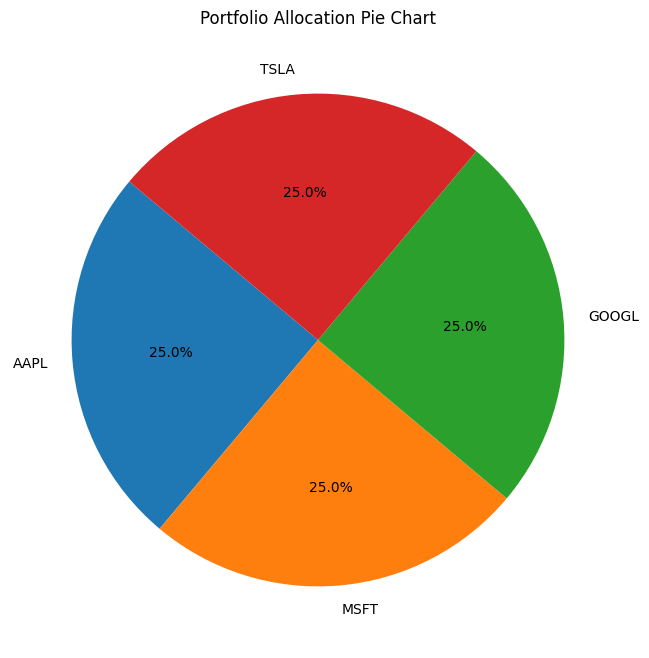

In [44]:
# Create a pie chart to visualize the portfolio allocation
plt.figure(figsize=(8, 8))
plt.pie(optimized_weights, 
        labels=portfolio_symbols, 
        autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Allocation Pie Chart")
plt.show()

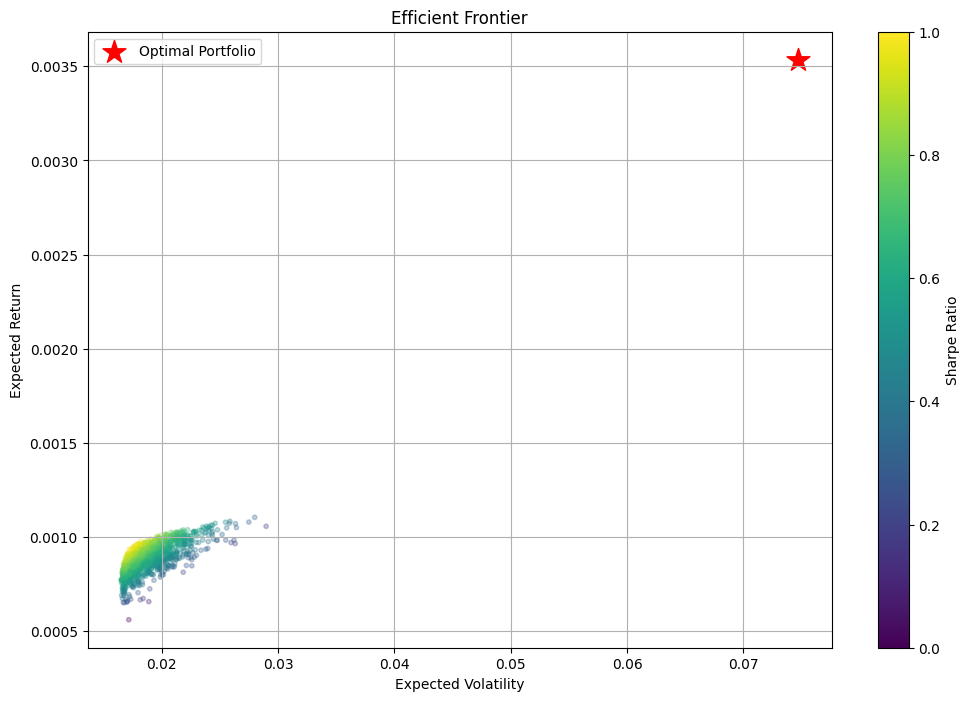

In [45]:
def generate_efficient_frontier(expected_returns, cov_matrix, num_portfolios=1000):
    """
    Generate the efficient frontier.

    Parameters:
    expected_returns (pandas.Series): Expected returns for each asset
    cov_matrix (pandas.DataFrame): Covariance matrix of returns
    num_portfolios (int): Number of portfolios to generate

    Returns:
    pandas.DataFrame: DataFrame with portfolio returns, volatilities, and weights
    """
    num_assets = len(expected_returns)
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        # Generate random weights
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        # Calculate portfolio return and volatility
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
        portfolio_volatility = np.sqrt(portfolio_variance)

        # Store results
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = portfolio_return / portfolio_volatility  # Sharpe ratio (without risk-free rate)
        weights_record.append(weights)

    # Convert results to DataFrame
    columns = ['Returns', 'Volatility', 'Sharpe']
    frontier_df = pd.DataFrame(results.T, columns=columns)

    # Add weights to DataFrame
    for j in range(num_assets):
        frontier_df[f'Weight_{j}'] = [weights_record[i][j] for i in range(num_portfolios)]

    return frontier_df

# Exemple d'utilisation
frontier_df = generate_efficient_frontier(expected_returns, cov_matrix)

# Visualiser la frontière efficiente
plt.figure(figsize=(12, 8))
plt.scatter(frontier_df['Volatility'], frontier_df['Returns'],
            c=frontier_df['Sharpe'], cmap='viridis',
            marker='o', s=10, alpha=0.3)

# Marquer le portefeuille optimal
plt.scatter(optimized_portfolio["Portfolio Volatility"],
            optimized_portfolio["Portfolio Return"],
            c='red', marker='*', s=300, label='Optimal Portfolio')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Import des nouveaux modules AI
from models.return_prediction import train_prediction_models, extract_features
from models.regime_detection import detect_market_regimes
from models.adaptive_optimization import optimize_with_predictions

# 1. Entraîner les modèles de prédiction
ai_models, features = train_prediction_models(preprocessed_data)

# 2. Obtenir les prédictions des modèles
if ai_models and features is not None and not features.empty:
    try:
        last_features = extract_features(preprocessed_data).iloc[-1:].values
        ai_predictions = pd.Series(
            {symbol: ai_models[symbol]['model'].predict(
                ai_models[symbol]['scaler'].transform(last_features)
            )[0] for symbol in ai_models.keys()},
            index=list(ai_models.keys())
        )
        
        print("Prédictions IA des rendements futurs:")
        print(ai_predictions)
        
        # 3. Détecter le régime de marché actuel
        regime_df, regime_model, regime_analysis = detect_market_regimes(preprocessed_data)
        if regime_model is not None:
            print("\nAnalyse des régimes de marché:")
            print(f"Nombre total de régimes: {len(regime_analysis)}")
            for regime_id, analysis in regime_analysis.items():
                print(f"\nRégime {regime_id}:")
                print(f"  Nombre de jours: {analysis['count']}")
                print(f"  Caractéristiques moyennes: {analysis['avg_features']}")

            # Identifier le régime actuel
            current_features = features.iloc[-1:].values
            current_regime = regime_model.predict(current_features)[0]
            print(f"\nRégime de marché actuel: {current_regime}")
            
            # 4. Optimisation adaptative avec AI (uniquement si nous avons des prédictions pour tous les actifs)
            if len(ai_predictions) == len(portfolio_symbols):
                # Ajuster les index pour s'assurer qu'ils correspondent
                aligned_predictions = pd.Series([ai_predictions.get(symbol, expected_returns[f"Returns_{symbol}"]) 
                                                for symbol in portfolio_symbols], index=portfolio_symbols)
                
                # Niveau de confiance dans les prédictions IA (ajustable)
                ai_confidence = 0.5
                
                # Optimiser le portefeuille en tenant compte des prédictions IA
                adaptive_portfolio = optimize_with_predictions(
                    expected_returns, 
                    cov_matrix, 
                    aligned_predictions, 
                    ai_confidence,
                    risk_free_rate
                )
                
                print("\nPortefeuille optimisé avec IA:")
                print("Poids:", adaptive_portfolio["Portfolio Weights"])
                print("Rendement attendu:", adaptive_portfolio["Portfolio Return"])
                print("Volatilité:", adaptive_portfolio["Portfolio Volatility"])
                print("Ratio de Sharpe:", adaptive_portfolio["Sharpe Ratio"])
                
                # 5. Comparer les résultats
                comparison = pd.DataFrame({
                    'Standard': optimized_portfolio["Portfolio Weights"],
                    'AI-Enhanced': adaptive_portfolio["Portfolio Weights"]
                }, index=portfolio_symbols)
                
                print("\nComparaison des allocations:")
                print(comparison)
                
                # Visualisation comparative
                plt.figure(figsize=(12, 6))
                comparison.plot(kind='bar')
                plt.title("Comparaison des allocations: Standard vs IA")
                plt.ylabel("Poids")
                plt.xlabel("Actifs")
                plt.grid(True, axis='y')
                plt.show()
            else:
                print("Pas assez de prédictions IA pour optimiser (obtenu", len(ai_predictions), 
                      "prédictions pour", len(portfolio_symbols), "actifs)")
        else:
            print("Impossible de détecter les régimes de marché - pas assez de données")
    except Exception as e:
        print(f"Erreur lors de l'exécution de l'optimisation basée sur l'IA: {str(e)}")
else:
    print("Pas de modèles AI générés - vérifiez les données d'entrée")

KeyError: 'Returns_Log Returns (AAPL)'